In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,classification_report

# Heart Disease UCI

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

In [4]:
df = pd.read_csv(r"C:\Users\avira\heart\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attributes Information-->
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

1. **age**: The person's age in years
2. **sex**: The person's sex (1 = male, 0 = female)
3. **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
5. **chol**: The person's cholesterol measurement in mg/dl
6. **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. **thalach**: The person's maximum heart rate achieved
9. **exang**: Exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11. **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. **ca**: The number of major vessels (0-3)
13. **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. **target**: Heart disease (0 = no, 1 = yes)

In [5]:
print("This dataset has-->\nColumns: {}\nRows: {}".format(df.shape[1],df.shape[0]))

This dataset has-->
Columns: 14
Rows: 303


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


I can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [71]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


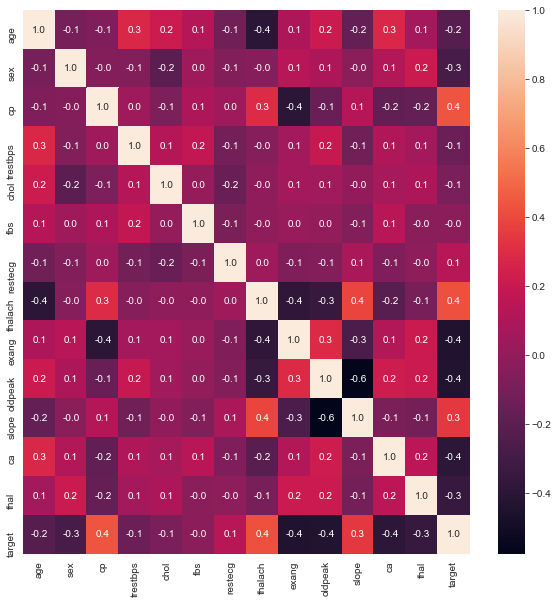

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

# Data Visualisation

Text(0.5, 1.0, 'Age Chart')

<Figure size 1080x720 with 0 Axes>

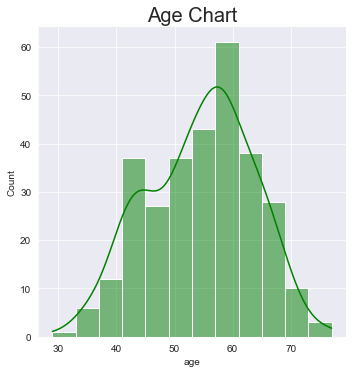

In [37]:
fig = plt.figure(figsize=(15,10))
ax = sns.displot(df.age,color='green',kde=True,label='Age')
plt.title('Age Chart',fontsize=20)

Most of the patients are around 50-60.

C:\Users\avira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\avira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Maximum Heart Rate Achieved')

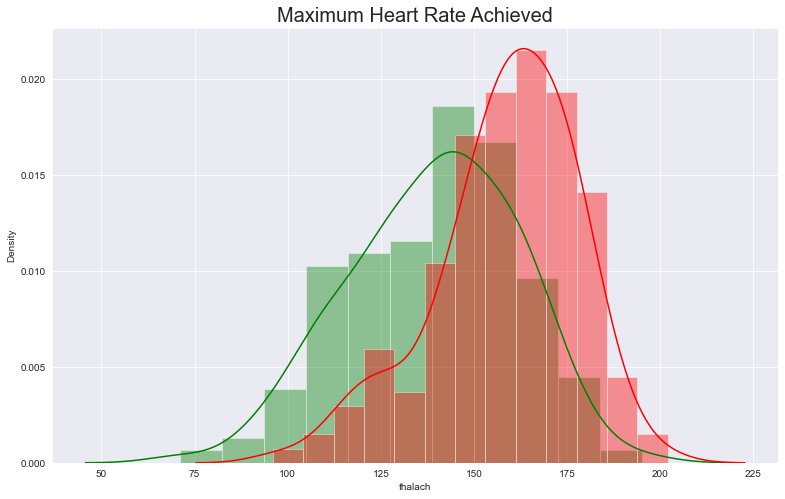

In [81]:
plt.figure(figsize=(13,8))
sns.distplot(df[df['target'] == 0]['thalach'],color='green')
sns.distplot(df[df['target'] == 1]['thalach'],color='red')
plt.title('Maximum Heart Rate Achieved',fontsize=20)

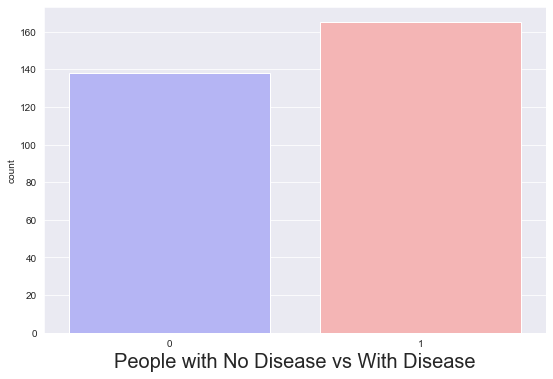

In [80]:
plt.figure(figsize=(9,6))
sns.countplot(x="target", data=df, palette="bwr")
plt.xlabel("People with No Disease vs With Disease",fontsize=20)
plt.show()

Text(0.5, 0, 'number of major vessels colored by flourosopy')

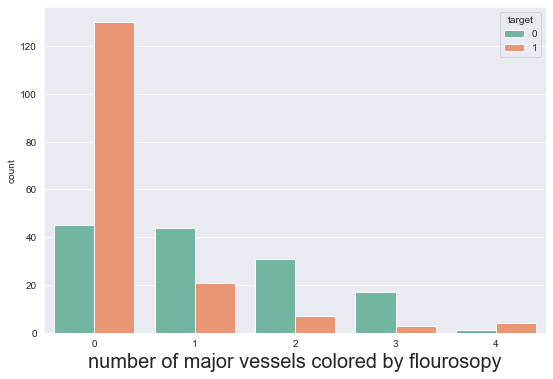

In [98]:
plt.figure(figsize=(9,6))
sns.countplot(x='ca',data=df,hue='target',palette='Set2')
plt.xlabel("number of major vessels colored by flourosopy",fontsize=20)

Text(0.5, 0, 'Resting electrocardiographic measurement')

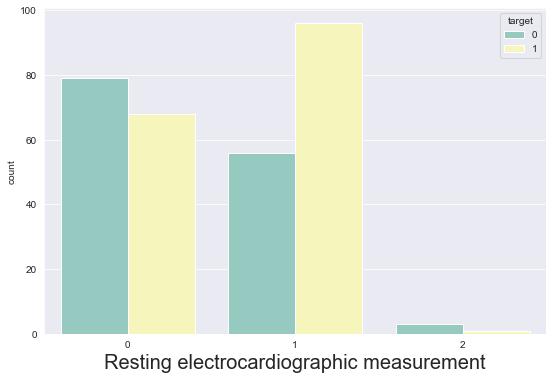

In [95]:
plt.figure(figsize=(9,6))
sns.countplot(x='restecg',data=df,hue='target',palette='Set3')
plt.xlabel("Resting electrocardiographic measurement",fontsize=20)

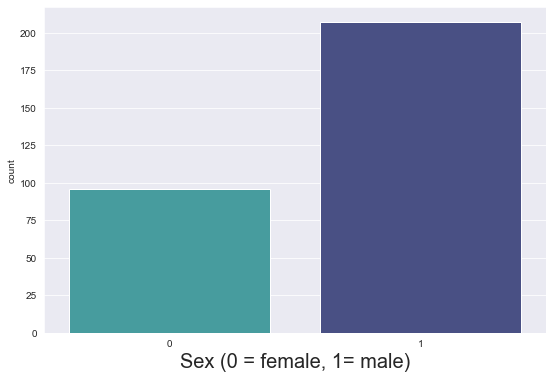

In [67]:
plt.figure(figsize=(9,6))
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)",fontsize=20)
plt.show()

<Figure size 864x648 with 0 Axes>

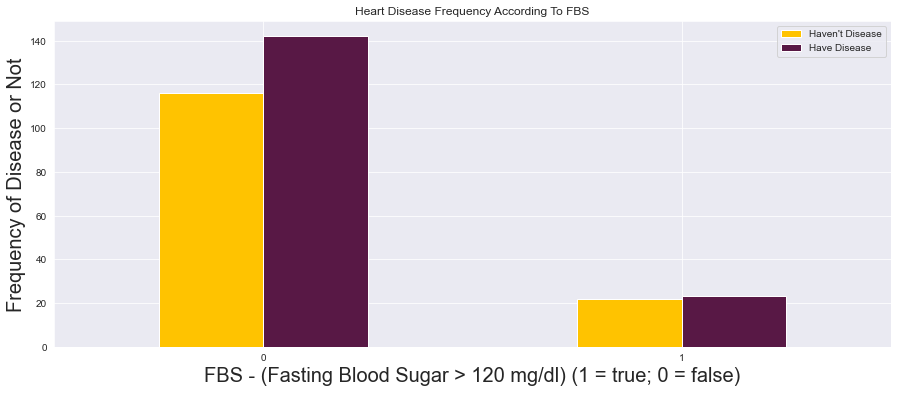

In [83]:
plt.figure(figsize=(12,9))
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)',fontsize=20)
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not',fontsize=20)
plt.show()

<Figure size 864x648 with 0 Axes>

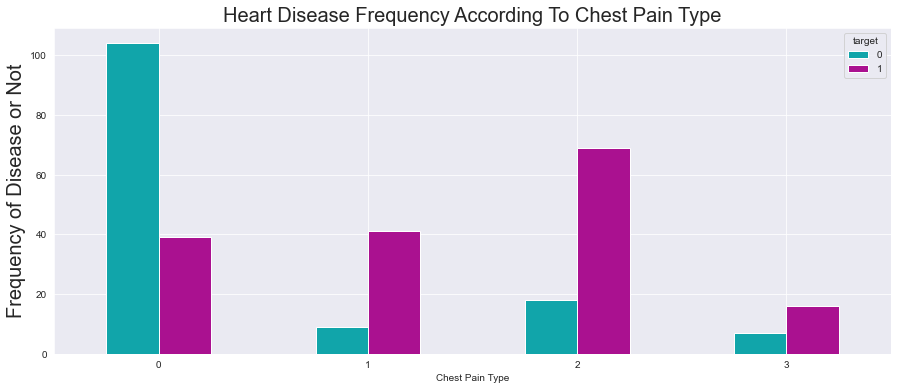

In [84]:
plt.figure(figsize=(12,9))
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type',fontsize=20)
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not',fontsize=20)
plt.show()

# Processing Training Data

In [10]:
X = df.drop(['target'],axis=1)
y = df[['target']]

In [11]:
print('X Shape', X.shape)
print('Y Shape',y.shape)

X Shape (303, 13)
Y Shape (303, 1)


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

print('Shape of x_train df',X_train.shape)
print('Shape of x_test df',X_test.shape)
print('Shape of y_train df',y_train.shape)
print('Shape of y_test df',y_test.shape)

Shape of x_train df (203, 13)
Shape of x_test df (100, 13)
Shape of y_train df (203, 1)
Shape of y_test df (100, 1)


# Logistic Regression

In [13]:
Logistic = LogisticRegression(random_state=0)

In [14]:
Logistic.fit(X_train,y_train)

C:\Users\avira\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\avira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [15]:
y_pred = Logistic.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.84      0.81      0.82        58

    accuracy                           0.80       100
   macro avg       0.79      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [17]:
print(confusion_matrix(y_test,y_pred))

[[33  9]
 [11 47]]


In [18]:
l = precision_score(y_test,y_pred)*100
print("{:.2f}".format(l),'%')

83.93 %


# KNeighborsClassifier

In [19]:
neighbours = KNeighborsClassifier()

In [20]:
neighbours.fit(X_train,y_train)

<ipython-input-20-8f53491b76c9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neighbours.fit(X_train,y_train)


KNeighborsClassifier()

In [21]:
y_predictions = neighbours.predict(X_test)

In [44]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        42
           1       0.71      0.71      0.71        58

    accuracy                           0.66       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.66      0.66      0.66       100



In [45]:
n = precision_score(y_test,y_pred)*100
print("{:.2f}".format(n),'%')

83.93 %


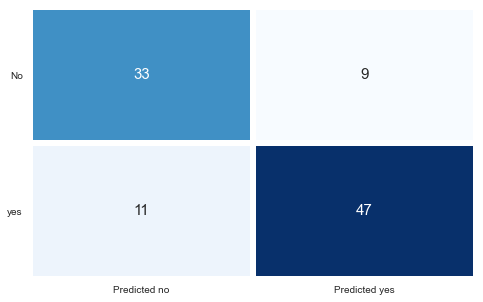

In [39]:
cm2 = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm2, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No', 'yes'], xticklabels = ['Predicted no', 'Predicted yes'])
plt.yticks(rotation = 0)
plt.show()

# Random Forrest Classifier

In [25]:
forrest = RandomForestClassifier(random_state=0)

In [26]:
forrest.fit(X_train,y_train)

<ipython-input-26-86e93e2b6a92>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forrest.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [27]:
predictions = forrest.predict(X_test)

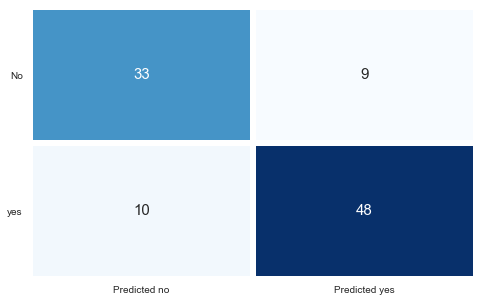

In [40]:
cm3 = confusion_matrix(y_test,predictions)
plt.figure(figsize = (8, 5))
sns.heatmap(cm3, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No', 'yes'], xticklabels = ['Predicted no', 'Predicted yes'])
plt.yticks(rotation = 0)
plt.show()

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        42
           1       0.84      0.83      0.83        58

    accuracy                           0.81       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [30]:
r = precision_score(y_test,predictions)*100
print("{:.2f}".format(r),'%')

84.21 %


In [31]:
print("Logistic Regression gave {} % precision\nKNeighboursClassifier gave {} % precision\nRandomForrestCLassifier gave {} % precision".format("{:.2f}".format(l),"{:.2f}".format(n),"{:.2f}".format(r)))

Logistic Regression gave 83.93 % precision
KNeighboursClassifier gave 83.93 % precision
RandomForrestCLassifier gave 84.21 % precision


**Conclusion**  
This dataset is old and small by today's standards. However, it's allowed us to create a simple model and then use various machine learning explainability tools and techniques to peek inside. At the start, I hypothesised, using (Googled) domain knowledge that factors such as cholesterol and age would be major factors in the model. This dataset didn't show that. Instead, the number of major factors and aspects of ECG results dominated. I actually feel like I've learnt a thing or two about heart disease!

I suspect this sort of approach will become increasingly important as machine learning has a greater and greater role in health care.